# The Quadratic Assignment Problem

In [44]:
##This is an initialization cell. Run this first
import pandas as pd
import numpy as np
from itertools import product
import time
import math
import matplotlib
import matplotlib.pyplot as plt

## Here we are creating a repository of different data sizes
We have our data from https://neos-guide.org/content/quadratic-assignment-problem and 
http://anjos.mgi.polymtl.ca/qaplib/
QAPLIB - A Quadratic Assignment Problem Library
R.E. BURKARD, E. ÇELA, S.E. KARISCH and F. RENDL

In [45]:
def CSVtoNumpyArray(rawdata):
    """
    Input: 
    rawdata = a csv file (insert name as a string)

    Output:
    two numpy matrices in a tuple
    """
    data = pd.read_csv(rawdata)  #Reads the data in as a pandas object
    c = data.columns
    column = int(c[0])
    final_data1 = data.iloc[:column,:].values  #Sets data into a series of numpy arrays of strings
    final_data2 = data.iloc[column:,:].values  #1 is for the first matrix(loc) and 2 is for the second(flow)
    

    #Forms the matrix as a numpy array (easier to work with) instead of an list of lists of strings
    def string_to_integers(final_data):
        matrix = []
        for j in range(column):
            string = final_data[j][0]
            string2 = string.split(" ")
            emptyarray = []
            for i in string2:
                if i != '':
                    emptyarray.append(int(i))
            matrix.append(emptyarray)
        npmatrix = np.array(matrix) 
        return npmatrix
    return string_to_integers(final_data1),string_to_integers(final_data2)

In [48]:
#REPOSITORY

#small sized matrices(under 10x10)
matrix_size_4 = 'tai4a.csv'
matrix_size_5 = 'tai5a.csv'
matrix_size_6 = 'tai6a.csv'
matrix_size_7 = 'tai7a.csv'
matrix_size_8 = 'tai8a.csv'
matrix_size_9 = 'tai9a.csv'

#medium sized matrices(ranging from 10x10 to 30x30)
matrix_size_10 = 'tai10a.csv'
matrix_size_11 = 'tai11a.csv'
matrix_size_12 = 'tai12a.csv'
matrix_size_15 = 'chr15a.csv' 
matrix_size_20 = 'chr20a.csv'
matrix_size_26 = 'bur26a.csv'

#large sized matrices(30x30 and bigger)
matrix_size_40 = 'tai40a.csv'
matrix_size_60 = 'tai60.csv'
matrix_size_80 = 'tai80.csv'
matrix_size_256 = 'tai256c.csv'

datamatrix = CSVtoNumpyArray('tai11a.csv') # Decide the size of problem to run in the code (clue: 
                                                #the number in the original name is the size)
MatrixLoc = datamatrix[0]
MatrixFlow = datamatrix[1]

## Preliminary functions

In [49]:
def ourpermutations(iterable, r=None):
    """
    Input:
    String or numbers separated by a space
    optional= the length that the permutations must be
    
    Output:
    a generator of permutations
    """
    
    pool = iterable.split(" ")
    n = len(pool)
    r = n if r is None else r
    for indices in product(range(n), repeat=r):
        if len(set(indices)) == r:
            yield tuple(pool[i] for i in indices)

In [50]:
#Demonstration of the Permutation function
"""
This is a very heavy generator - there seems to be litle to no way to make it more efficient. Even without 
printing every part of it is slow
"""
start = time.time()
r = ourpermutations('1 2 3 4 5 6 7')# 8 9 10')
print(list(r))
#print(next(r))
#print(next(r))
#these are the time calculation
end = time.time()
thetime = end - start
print(thetime)

[('1', '2', '3', '4', '5', '6', '7'), ('1', '2', '3', '4', '5', '7', '6'), ('1', '2', '3', '4', '6', '5', '7'), ('1', '2', '3', '4', '6', '7', '5'), ('1', '2', '3', '4', '7', '5', '6'), ('1', '2', '3', '4', '7', '6', '5'), ('1', '2', '3', '5', '4', '6', '7'), ('1', '2', '3', '5', '4', '7', '6'), ('1', '2', '3', '5', '6', '4', '7'), ('1', '2', '3', '5', '6', '7', '4'), ('1', '2', '3', '5', '7', '4', '6'), ('1', '2', '3', '5', '7', '6', '4'), ('1', '2', '3', '6', '4', '5', '7'), ('1', '2', '3', '6', '4', '7', '5'), ('1', '2', '3', '6', '5', '4', '7'), ('1', '2', '3', '6', '5', '7', '4'), ('1', '2', '3', '6', '7', '4', '5'), ('1', '2', '3', '6', '7', '5', '4'), ('1', '2', '3', '7', '4', '5', '6'), ('1', '2', '3', '7', '4', '6', '5'), ('1', '2', '3', '7', '5', '4', '6'), ('1', '2', '3', '7', '5', '6', '4'), ('1', '2', '3', '7', '6', '4', '5'), ('1', '2', '3', '7', '6', '5', '4'), ('1', '2', '4', '3', '5', '6', '7'), ('1', '2', '4', '3', '5', '7', '6'), ('1', '2', '4', '3', '6', '5', '7'), 

In [51]:
def ExhaustiveSearchinputs(datamatrix):
    """
    Input:
    datamatrix: numpy array
    
    Output:
    list of every permutation allowed and the time it took to run(this is to help with the optimisation and 
    testing process)
    
    """
    
    # Important starting values
    start = time.time()
    length = len(datamatrix)
    thestring = ""
    
    #Generate the permutations
    for i in range(0,length):  #this is making a string of numbers from 0 to the size of the matrix -1
        thestring += str(i) + " "
    thestring = thestring[:-1]
    listofassociations = list(ourpermutations(thestring,length))  #this was the function we made earlier
    
    #these are the time calculation
    end = time.time()
    thetime = end - start
    return listofassociations, thetime,thestring
##########PLEASE NOTE THIS FUNCTION TAKES 4 seconds once datamatrix is length 8 and takes 99 seconds for 
##########length 9 so don't use values in the repository(use datamatrix size 3 for now)##############

### Time test for ExhaustiveSearchinputs

In [53]:
listofpermutations= ExhaustiveSearchinputs(MatrixLoc)[0]
time_taken_10 = ExhaustiveSearchinputs(MatrixLoc)[1]
print(time_taken_10)


KeyboardInterrupt: 

In [54]:
time_taken_10

73961.41815924644

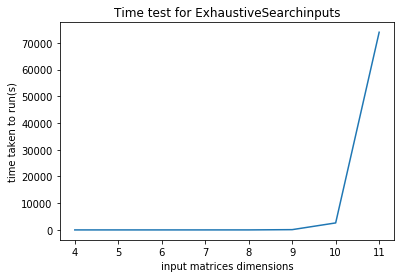

In [57]:
#plot
time_taken = [0.00034046173095703125, 0.0023462772369384766, 0.015115022659301758, 0.19432568550109863, 
              4.150153875350952, 101.804532289505, 2618.7232191562653,73961.41815924644]
length = [4,5,6,7,8,9,10,11]


fig, ax = plt.subplots()
ax.plot(length, time_taken)

ax.set(xlabel='input matrices dimensions', ylabel='time taken to run(s)',
       title='Time test for ExhaustiveSearchinputs')

fig.savefig("Time test for ExhaustiveSearchinputs.png")
plt.show()

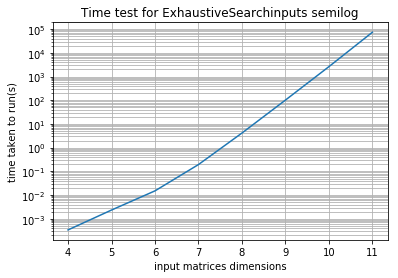

In [67]:
#semilogplot
time_taken = [0.00034046173095703125, 0.0023462772369384766, 0.015115022659301758, 0.19432568550109863, 
              4.150153875350952, 101.804532289505, 2618.7232191562653,73961.41815924644]
length = [4,5,6,7,8,9,10,11]

plt.grid(True, which="both")# Display grid

plt.semilogy(length, time_taken)
plt.xlabel('input matrices dimensions')# Give x axis label for the semilog plot
plt.ylabel('time taken to run(s)')# Give y axis label for the semilog plot

plt.title('Time test for ExhaustiveSearchinputs semilog')# Provide the title for the semilog plot
plt.savefig("Time test for ExhaustiveSearchinputs semilog.png")

plt.show()

In [58]:
print(time_taken)

[0.00034046173095703125, 0.0023462772369384766, 0.015115022659301758, 0.19432568550109863, 4.150153875350952, 101.804532289505, 2618.7232191562653, 73961.41815924644]


# Exhaustive search

In [59]:
def generate_optimal_permutation(listofpermutations,MatrixLocat,MatrixFlow):
    """
    Input:
    MatrixLoc
    MatrixFlow
    listofpermutaions
    
    Output:
    The optimal permutation
    the optimal cost
    in a tuple
    """
    start = time.time()
    matrix_length = len(MatrixLoc)
    no_of_permutations = len(listofpermutations)
    arraysol = []
    
    #generate the multiples (that function we are optimising)
    for j in range(no_of_permutations):
        perm = listofpermutations[j]
        total = 0
        for i in range(matrix_length - 1):
            total += MatrixLoc[i][i+1]*MatrixFlow[int(perm[i])][int(perm[i+1])]#this is that function that 
                                                #adds the products of different combinations of factories
        arraysol.append(total)
    
    finalcost = min(arraysol)
    finalindex = np.argmin(arraysol) #finds the optimal set of locations to factories(Which I stupidly 
                                        #called flow)
    end = time.time()
    thetime = end - start    
    return listofpermutations[finalindex],finalcost,thetime
        

In [60]:
#generate_optimal_permutation(listofpermutations,MatrixLoc,MatrixFlow)

### Time test for generate_optimal_permutation

In [61]:
time_taken_10Ex = generate_optimal_permutation(listofpermutations,MatrixLoc,MatrixFlow)[2]
print(time_taken_Ex)

NameError: name 'time_taken_Ex' is not defined

In [62]:
time_taken_Ex = [0.0004937648773193359, 0.002483844757080078, 0.020618915557861328, 0.0518794059753418, 
                 0.30233120918273926, 2.8140180110931396, 31.34966278076172,time_taken_10Ex]

print(time_taken_Ex)

[0.0004937648773193359, 0.002483844757080078, 0.020618915557861328, 0.0518794059753418, 0.30233120918273926, 2.8140180110931396, 31.34966278076172, 384.41877460479736]


# Branch and bound

In [63]:
def generate_optimal_permutationBnB(listofpermutations,MatrixLocat,MatrixFlow):
    """
    Input:
    MatrixLoc
    MatrixFlow
    listofpermutaions
    
    Output:
    The optimal permutation
    the optimal cost
    in a tuple
    """
    start = time.time()
    matrix_length = len(MatrixLoc)
    no_of_permutations = len(listofpermutations)
    arraysol = []
    bettersol = math.inf
    bettersolind = 0
    
    #generate the multiples (that function we are optimising)
    for j in range(no_of_permutations):
        perm = listofpermutations[j]
        total = 0
        i =0
        while bettersol>=total and i < matrix_length - 1:
            total += MatrixLoc[i][i+1]*MatrixFlow[int(perm[i])][int(perm[i+1])]#this is that function that 
                                                #adds the products of different combinations of factories
            i += 1
        if bettersol>total:
            bettersol = total
            bettersolind = j
        
    
    finalcost = bettersol
    finalindex = bettersolind
    end = time.time()
    thetime = end - start
    
    return listofpermutations[finalindex],finalcost,thetime

In [64]:
#generate_optimal_permutationBnB(listofpermutations,MatrixLoc,MatrixFlow)

### Time test for generate_optimal_permutationBnB

In [65]:
time_taken_11BnB = generate_optimal_permutationBnB(listofpermutations,MatrixLoc,MatrixFlow)[2]
print(time_taken_BnB)

NameError: name 'time_taken_BnB' is not defined

In [68]:
time_taken_BnB = [0.0003864765167236328, 0.0010573863983154297, 0.008874177932739258, 0.034032344818115234, 
                  0.1289994716644287, 1.0707018375396729, 6.384488821029663,time_taken_11BnB]
print(time_taken_BnB)


[0.0003864765167236328, 0.0010573863983154297, 0.008874177932739258, 0.034032344818115234, 0.1289994716644287, 1.0707018375396729, 6.384488821029663, 72.27712178230286]


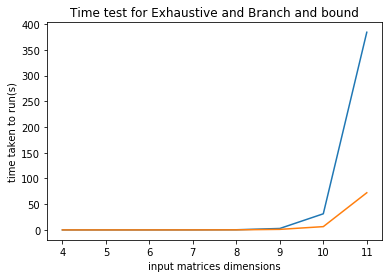

In [70]:
#plot
length = [4,5,6,7,8,9,10,11]

fig, ax = plt.subplots()
ax.plot(length, time_taken_Ex,length,time_taken_BnB)

ax.set(xlabel='input matrices dimensions', ylabel='time taken to run(s)',
       title='Time test for Exhaustive and Branch and bound')

fig.savefig("Time test for Exhaustive and Branch and bound.png")
plt.show()

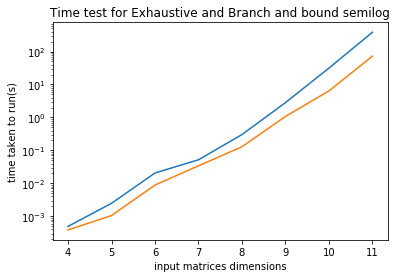

In [71]:
#semilogplot
length = [4,5,6,7,8,9,10,11]

plt.semilogy(length, time_taken_Ex,length,time_taken_BnB)

plt.xlabel('input matrices dimensions')# Give x axis label for the semilog plot
plt.ylabel('time taken to run(s)')# Give y axis label for the semilog plot

plt.title('Time test for Exhaustive and Branch and bound semilog')# Provide the title for the semilog plot
plt.savefig("Time test for Exhaustive and Branch and bound semilog.png")

plt.show()

In [36]:
def getPermutations(string, prefix=[]):
    print(type(string))
    if len(string) == 1:
        print("1")
        yield prefix.append(string)
        print("2")
    else:
        print("3")
        for i in range(len(string)):
            print("4")
            newstring = string[:i]
            print(newstring)
            newstring.append(string[i+1:][0])
            print(newstring,prefix)
            prefix.append(string[i][0])
            print(prefix,"prefix")
            string=newstring
            for perm in getPermutations(string, prefix):
                print("5")
                yield perm
                print("6")

In [37]:
start = time.time()
run = getPermutations("1231")
print(run)

print(list(getPermutations(['1','2','3','4','5'])))
end = time.time()
thetime = end - start
print(thetime)

<generator object getPermutations at 0x7fae68d95de0>
<class 'list'>
3
4
[]
['2'] []
['1'] prefix
<class 'list'>
1
5
6
2
4
['2']


IndexError: list index out of range

In [20]:
def getPermutations(string, prefix=""):
    if len(string) == 1:
        yield prefix + string
    else:
        for i in range(len(string)):
            for perm in getPermutations(string[:i] + string[i+1:], prefix+string[i]):
                yield perm

In [76]:
#w is a list
def NumpyArraytoCSV(permutations):
    import csv
    csvData = permutations

    with open('perm11.csv', 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(csvData)

    csvFile.close()
    return True

In [77]:
NumpyArraytoCSV(listofpermutations)

True